In [ ]:
import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel('/content/Video_to_text Dataset.xlsx')

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import numpy as np

def calculate_gss(X, labels):
    """
    Calculate the Group Sum of Squares (GSS) for clustered data.

    Parameters:
    - X: np.array, shape (n_samples, n_features)
    - labels: np.array, shape (n_samples,)

    Returns:
    - gss: float
    """
    overall_mean = np.mean(X, axis=0)
    gss = 0
    unique_labels = np.unique(labels)

    for label in unique_labels:
        if label == -1:
            continue  # Ignore noise in DBSCAN
        cluster_points = X[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        gss += len(cluster_points) * np.sum((cluster_mean - overall_mean) ** 2)

    return gss


In [ ]:
def normalize_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+','',text,flags=re.MULTILINE)
  text = re.sub(r'<.*?>','',text)
  text = re.sub(r'[^a-zA-Z\s]','',text)
  text = text.strip()
  return text

In [ ]:
df['Cleaned_text_step1'] = df['Summary'].apply(normalize_text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

In [ ]:
df['Filtered_text_step2']=df['Cleaned_text_step1'].apply(remove_stopwords)

In [ ]:
df

,NEWS (Full Transcript),Summary,Catagory,Cleaned_text_step1,Filtered_text_step2
0,slet me try and get details from amin who has ...,slet me try and get details from amin who has...,crime,slet me try and get details from amin who has ...,"[l, e, , e, , r, , n, , g, e, , e, l, , ..."
1,helowan welcome to medical diale ofzemyakshi l...,A senior cardiologys's recent witer post has ...,crime,a senior cardiologyss recent witer post has go...,"[ , e, n, r, , c, r, l, g, , r, e, c, e, n, ..."
2,a study suggest more than eight hundred millio...,Start a day with a glass of water can help ro...,crime,start a day with a glass of water can help roo...,"[r, , , , w, h, , , g, l, , f, , w, e, ..."
3,society enagermental konegaruhe took my child...,In a remote village in madepradesh a nine-yea...,crime,in a remote village in madepradesh a nineyear ...,"[n, , , r, e, e, , v, l, l, g, e, , n, , ..."
4,now jave rekengoa his raced concerns about law...,A criminal involved in landgrabbing escaped t...,crime,a criminal involved in landgrabbing escaped th...,"[ , c, r, n, l, , n, v, l, v, e, , n, , l, ..."
...,...,...,...,...,...
194,banglodesh has approached pakistan to procure ...,banglodesh has approached pakistan to procure...,technology,banglodesh has approached pakistan to procure ...,"[b, n, g, l, e, h, , h, , p, p, r, c, h, e, ..."
195,right-time modihelde meeting in new york with ...,right-time modihelde meeting in new york with...,technology,righttime modihelde meeting in new york with s...,"[r, g, h, e, , h, e, l, e, , e, e, n, g, , ..."
196,when you buy a bike or you sit on a bike you r...,The bike you ride the car you drive tells eve...,technology,the bike you ride the car you drive tells ever...,"[h, e, , b, k, e, , u, , r, e, , h, e, , ..."
197,fo india's ambitiousspotic submission is seit ...,This groundbreaking mission aims to develop a...,technology,this groundbreaking mission aims to develop an...,"[h, , g, r, u, n, b, r, e, k, n, g, , n, , ..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
df['lemmatized_text_step3']=df['Filtered_text_step2'].apply(lemmatize_tokens)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(df['lemmatized_text_step3'].tolist(),show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
embeddings

array([[ 0.19792257,  0.24616703,  0.01217191, ..., -0.08556543,
         0.6433867 ,  0.23217316],
       [ 0.3504756 ,  0.24142437,  0.05218107, ..., -0.23822562,
         0.7177446 ,  0.23196316],
       [-0.20192842, -0.08406166, -0.96718115, ...,  0.14761859,
         0.23666292,  0.02295727],
       ...,
       [-0.31379336,  0.72624046, -0.20671931, ..., -0.18895449,
         0.5054616 ,  0.3127214 ],
       [-0.4394558 ,  0.8847195 , -0.3966086 , ..., -0.19779025,
         0.47550884,  0.23805183],
       [-0.4435655 ,  0.8249734 , -0.49407828, ..., -0.22275712,
         0.5172868 ,  0.2073414 ]], dtype=float32)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 8
clustering1 = AgglomerativeClustering(n_clusters=n_clusters,linkage = 'ward')
df['Cluster'] = clustering1.fit_predict(embeddings)

In [ ]:
df.shape


(199, 7)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Create a DBSCAN object with desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model to your embeddings
dbscan_labels = dbscan.fit_predict(embeddings)

# Add the cluster labels to your DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
df

,NEWS (Full Transcript),Summary,Catagory,Cleaned_text_step1,Filtered_text_step2,lemmatized_text_step3,Cluster,DBSCAN_Cluster
0,slet me try and get details from amin who has ...,slet me try and get details from amin who has...,crime,slet me try and get details from amin who has ...,"[l, e, , e, , r, , n, , g, e, , e, l, , ...","[l, e, , e, , r, , n, , g, e, , e, l, , ...",0,-1
1,helowan welcome to medical diale ofzemyakshi l...,A senior cardiologys's recent witer post has ...,crime,a senior cardiologyss recent witer post has go...,"[ , e, n, r, , c, r, l, g, , r, e, c, e, n, ...","[ , e, n, r, , c, r, l, g, , r, e, c, e, n, ...",0,0
2,a study suggest more than eight hundred millio...,Start a day with a glass of water can help ro...,crime,start a day with a glass of water can help roo...,"[r, , , , w, h, , , g, l, , f, , w, e, ...","[r, , , , w, h, , , g, l, , f, , w, e, ...",4,-1
3,society enagermental konegaruhe took my child...,In a remote village in madepradesh a nine-yea...,crime,in a remote village in madepradesh a nineyear ...,"[n, , , r, e, e, , v, l, l, g, e, , n, , ...","[n, , , r, e, e, , v, l, l, g, e, , n, , ...",5,1
4,now jave rekengoa his raced concerns about law...,A criminal involved in landgrabbing escaped t...,crime,a criminal involved in landgrabbing escaped th...,"[ , c, r, n, l, , n, v, l, v, e, , n, , l, ...","[ , c, r, n, l, , n, v, l, v, e, , n, , l, ...",2,-1
...,...,...,...,...,...,...,...,...
194,banglodesh has approached pakistan to procure ...,banglodesh has approached pakistan to procure...,technology,banglodesh has approached pakistan to procure ...,"[b, n, g, l, e, h, , h, , p, p, r, c, h, e, ...","[b, n, g, l, e, h, , h, , p, p, r, c, h, e, ...",0,-1
195,right-time modihelde meeting in new york with ...,right-time modihelde meeting in new york with...,technology,righttime modihelde meeting in new york with s...,"[r, g, h, e, , h, e, l, e, , e, e, n, g, , ...","[r, g, h, e, , h, e, l, e, , e, e, n, g, , ...",4,-1
196,when you buy a bike or you sit on a bike you r...,The bike you ride the car you drive tells eve...,technology,the bike you ride the car you drive tells ever...,"[h, e, , b, k, e, , u, , r, e, , h, e, , ...","[h, e, , b, k, e, , u, , r, e, , h, e, , ...",3,2
197,fo india's ambitiousspotic submission is seit ...,This groundbreaking mission aims to develop a...,technology,this groundbreaking mission aims to develop an...,"[h, , g, r, u, n, b, r, e, k, n, g, , n, , ...","[h, , g, r, u, n, b, r, e, k, n, g, , n, , ...",3,-1


In [ ]:
# Calculate Silhouette Score
dbscan_silhouette = silhouette_score(embeddings, dbscan_labels)
print(f"DBSCAN Clustering Silhouette Score: {dbscan_silhouette}")

# Calculate Davies-Bouldin Index
dbscan_dbi = davies_bouldin_score(embeddings, dbscan_labels)
print(f"DBSCAN Clustering Davies-Bouldin Index: {dbscan_dbi}")

DBSCAN Clustering Silhouette Score: 0.5205692052841187
DBSCAN Clustering Davies-Bouldin Index: 1.052930074891204


In [ ]:
dbscan_labels = df['DBSCAN_Cluster'].values
dbscan_gss = calculate_gss(embeddings, dbscan_labels)
print(f"DBSCAN Clustering Group Sum of Squares (GSS): {dbscan_gss}")

DBSCAN Clustering Group Sum of Squares (GSS): 2259.781982421875


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity

# Set number of clusters
n_clusters = 8

# Create a cosine similarity matrix from embeddings
# similarity_matrix = cosine_similarity(embeddings)

# Perform Spectral Clustering using precomputed similarity
clustering2 = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)

# Assign predicted cluster labels to DataFrame
df['SpectralCluster'] = clustering2.fit_predict(embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

spectral_silhouette = silhouette_score(embeddings, df['SpectralCluster'])  # Use the column where Spectral labels are stored
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette}")


Spectral Clustering Silhouette Score: 0.5534377098083496


In [ ]:
from sklearn.metrics import davies_bouldin_score

spectral_db_index = davies_bouldin_score(embeddings, df['SpectralCluster'])
print(f"Spectral Clustering Davies-Bouldin Score: {spectral_db_index}")


Spectral Clustering Davies-Bouldin Score: 1.1202963921691866


In [ ]:
spectral_labels = df['SpectralCluster'].values
spectral_gss = calculate_gss(np.array(embeddings), spectral_labels)
print(f"Spectral Clustering Group Sum of Squares (GSS): {spectral_gss}")

Spectral Clustering Group Sum of Squares (GSS): 2816.416015625


In [ ]:
agglomerative_silhouette = silhouette_score(embeddings, df['Cluster'])  # Use the column where Agglomerative labels are stored
print(f"Agglomerative Clustering Silhouette Score: {agglomerative_silhouette}")

Agglomerative Clustering Silhouette Score: 0.4138098955154419


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(embeddings, df['Cluster'])

print(f"Davies-Bouldin Score: {davies_bouldin_index}")

Davies-Bouldin Score: 1.3656148576100808


In [ ]:
agglomerative_gss = calculate_gss(embeddings, df['Cluster'].values)
print(f"Agglomerative Clustering Group Sum of Squares (GSS): {agglomerative_gss}")


Agglomerative Clustering Group Sum of Squares (GSS): 45.38858413696289


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embeddings)

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

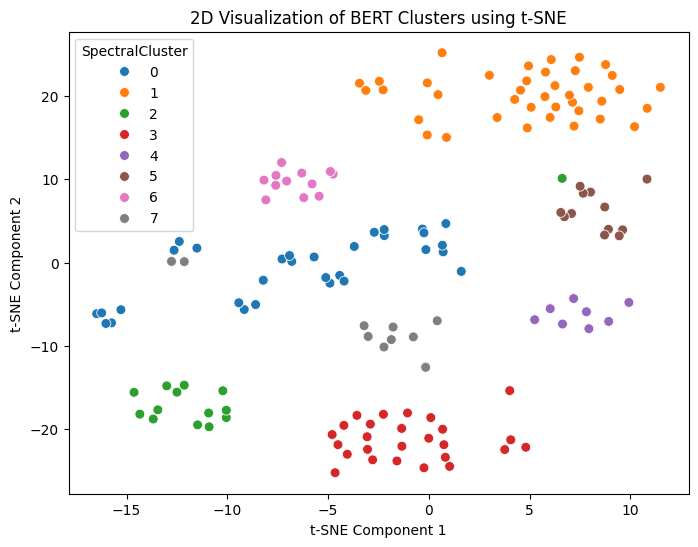

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['SpectralCluster'] ,palette="tab10", s=50)
plt.title("2D Visualization of BERT Clusters using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

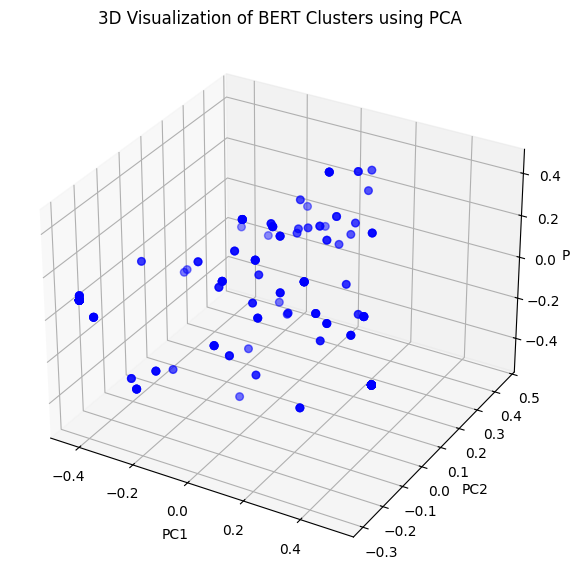

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D using PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(embeddings)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], c="blue", s=30)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D Visualization of BERT Clusters using PCA")
plt.show()


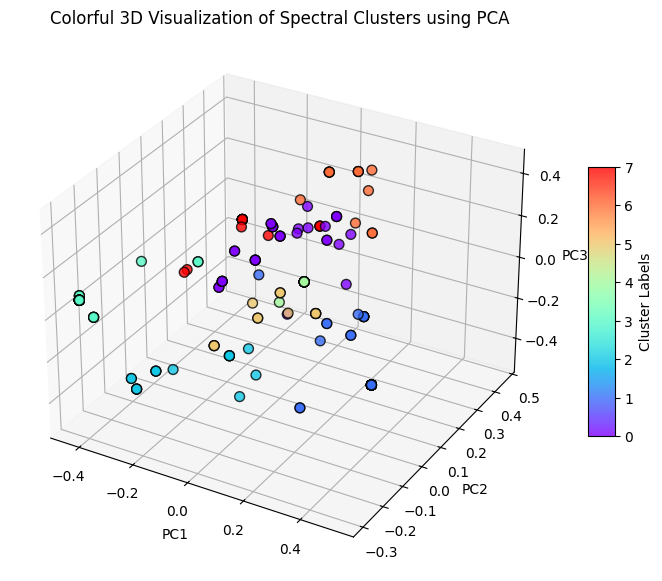

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA

# Reduce to 3D using PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(embeddings)

# Create a figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for clusters
scatter = ax.scatter(
    pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2],
    c=df['SpectralCluster'], cmap="rainbow", s=50, alpha=0.8, edgecolors="k"
)

# Labels and title
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Colorful 3D Visualization of Spectral Clusters using PCA")

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster Labels")

# Show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 8 # Adjust if necessary based on your findings

# Run KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Add the KMeans clustering results to the dataset for easy reference
df['KMeans_Cluster'] = kmeans_labels

In [ ]:
kmeans_silhouette = silhouette_score(embeddings, kmeans_labels)
print(f"KMeans Clustering Silhouette Score: {kmeans_silhouette}")

KMeans Clustering Silhouette Score: 0.4745979309082031


In [ ]:
kmeans_dbi = davies_bouldin_score(embeddings, kmeans_labels)
print(f"KMeans Clustering Davies-Bouldin Index: {kmeans_dbi}")

KMeans Clustering Davies-Bouldin Index: 1.4564287666735911


In [ ]:
kmeans_gss = calculate_gss(embeddings, kmeans_labels)
print(f"KMeans Clustering Group Sum of Squares (GSS): {kmeans_gss}")


KMeans Clustering Group Sum of Squares (GSS): 44.939979553222656


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cluster import KMeans
score = []
score2 = []
for k in range(8,17):
  model = KMeans(n_clusters=k)
  model.fit(embeddings)
  score.append(silhouette_score(embeddings,model.labels_))
  score2.append(davies_bouldin_score(embeddings,model.labels_))
  print(k,silhouette_score(embeddings,model.labels_))

8 0.47982258
9 0.50863725
10 0.5258232
11 0.5491396
12 0.567498
13 0.5783021
14 0.58529437
15 0.57022774
16 0.6123199


In [ ]:
from sklearn.cluster import AgglomerativeClustering
score1 = []
score3 = []
for k in range(8,17):
  model = AgglomerativeClustering(n_clusters=k)
  model.fit(embeddings)
  score1.append(silhouette_score(embeddings,model.labels_))
  score3.append(davies_bouldin_score(embeddings,model.labels_))
  print(k,silhouette_score(embeddings,model.labels_))

8 0.47737685
9 0.49703965
10 0.51826197
11 0.5498195
12 0.5678411
13 0.58617836
14 0.6012362
15 0.6152425
16 0.62708616


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity
score4 = []
score5 = []
for k in range(8,17):
  model2 = SpectralClustering(n_clusters=k,affinity="nearest_neighbors",random_state=42)
  model2.fit(embeddings)
  score4.append(silhouette_score(embeddings,model2.labels_))
  score5.append(davies_bouldin_score(embeddings,model2.labels_))
  print(k,silhouette_score(embeddings,model2.labels_))

8 0.49123168
9 0.5108602
10 0.5382793


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


11 0.5626799
12 0.5137982
13 0.53397715
14 0.5551534


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


15 0.5715577
16 0.57194304


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


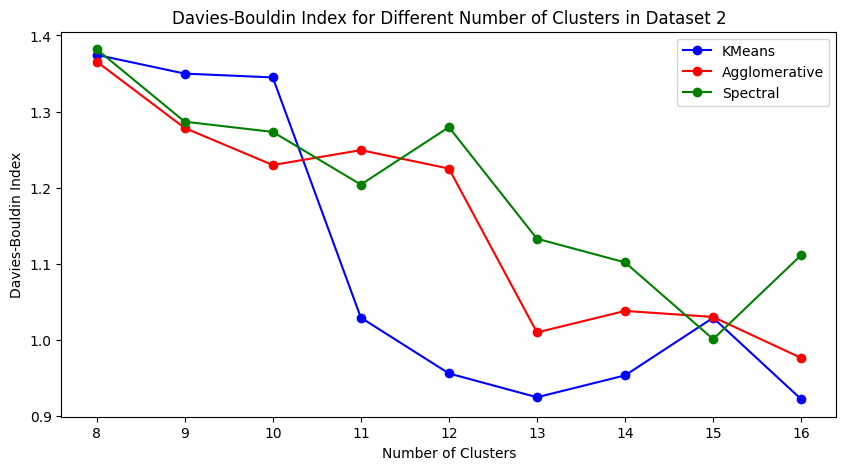

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(8,17),score2,marker='o',color = 'blue')
plt.plot(range(8,17),score3,marker='o',color = 'red')
plt.plot(range(8,17),score5,marker='o',color = 'green')
# plt.plot(range(8,17),score5,marker='o',color = 'yellow')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Clusters in Dataset 2')
plt.legend(['KMeans','Agglomerative','Spectral'])
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
score7 = []
score8 = []
for k in range(5,25):
  model3 = DBSCAN(eps=1.0, min_samples=k)
  model3.fit(embeddings)
  score7.append(silhouette_score(embeddings,model3.labels_))
  score8.append(davies_bouldin_score(embeddings,model3.labels_))
  print(k,silhouette_score(embeddings,model3.labels_))

5 0.51512015
6 0.45820656
7 0.35521606
8 0.35521606
9 0.35521606
10 0.35521606
11 0.35521606
12 0.35857937
13 0.35857937
14 0.35857937
15 0.35857937
16 0.35857937
17 0.35857937
18 0.35857937
19 0.35857937
20 0.35857937
21 0.35857937
22 0.35857937
23 0.35857937
24 0.35857937


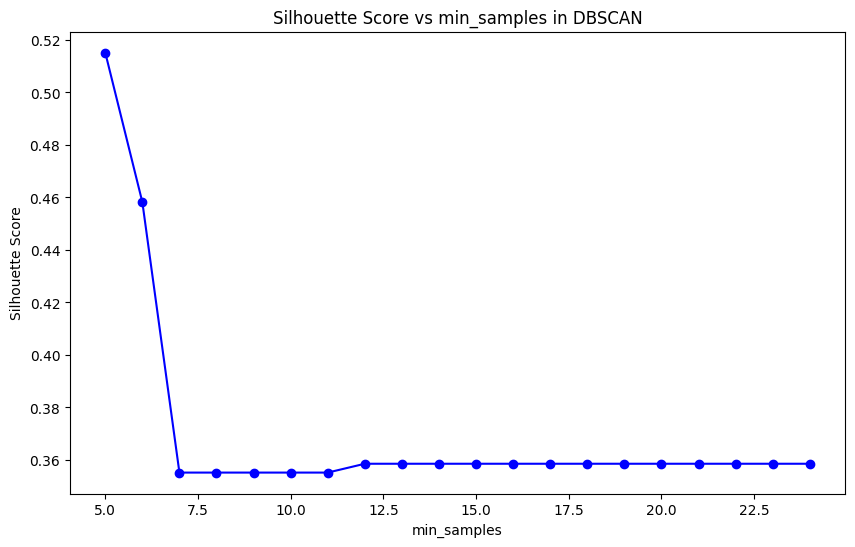

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,25),score7,marker='o',color = 'blue')
# plt.plot(range(5,25),score8,marker='o',color = 'red')
plt.title("Silhouette Score vs min_samples in DBSCAN")
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.show()